In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from math import floor, ceil

In [36]:
df = pd.read_json('runs.json')

# df.drop(columns=['times', 'compilationTimes'], inplace=True)

df = df[df['runArg'].isin([11,12])]

df['compilationFlags'] = df['compilationFlags'].apply(lambda x: " ".join(x))

df

,hasError,compilationFlags,runArg,times,compilationTimes,meanTime,meanCompilationTime
0,False,-O0 -march=native,11,"[6.468, 6.503, 6.458, 6.456, 6.503, 6.523, 6.4...","[0.059000000000000004, 0.06, 0.055, 0.055, 0.0...",6.4810,0.0566
1,False,-O1 -march=native,11,"[2.892, 2.884, 2.894, 2.901, 2.965, 2.915, 2.8...","[0.066, 0.067, 0.068, 0.066, 0.07, 0.066, 0.08...",2.9210,0.0687
2,False,-O2 -march=native,11,"[2.8369999999999997, 2.801, 2.992, 3.049, 2.87...","[0.077, 0.076, 0.076, 0.091, 0.084, 0.08600000...",2.9683,0.0807
3,False,-O3 -march=native,11,"[3.388, 3.173, 3.142, 3.379, 3.159, 3.342, 3.1...","[0.10400000000000001, 0.097, 0.102000000000000...",3.2664,0.0993
4,False,-ftree-partial-pre -fcaller-saves -finline -fi...,11,"[6.514, 6.418, 6.421, 6.498, 6.415, 6.522, 6.5...","[0.052000000000000005, 0.059000000000000004, 0...",6.4565,0.0551
5,False,-O0 -march=native,12,"[88.241, 88.218, 88.268, 89.515, 88.255, 88.26...","[0.057, 0.057, 0.055, 0.057, 0.056, 0.054, 0.0...",88.4866,0.0555
6,False,-O1 -march=native,12,"[39.359, 39.348, 39.045, 39.275, 39.717, 39.30...","[0.074, 0.076, 0.07200000000000001, 0.066, 0.0...",39.2870,0.0731
7,False,-O2 -march=native,12,"[39.2, 38.993, 39.023, 37.437, 39.51, 38.963, ...","[0.081, 0.084, 0.084, 0.092, 0.083, 0.084, 0.0...",38.2708,0.0844
8,False,-O3 -march=native,12,"[43.796, 43.209, 41.626, 43.513, 41.622, 41.58...","[0.107, 0.099, 0.098, 0.114, 0.104000000000000...",42.6048,0.1036
9,False,-ftree-partial-pre -fcaller-saves -finline -fi...,12,"[89.034, 87.976, 89.09, 89.094, 87.962, 89.167...","[0.058, 0.055, 0.06, 0.056, 0.064, 0.055, 0.05...",88.5430,0.0578


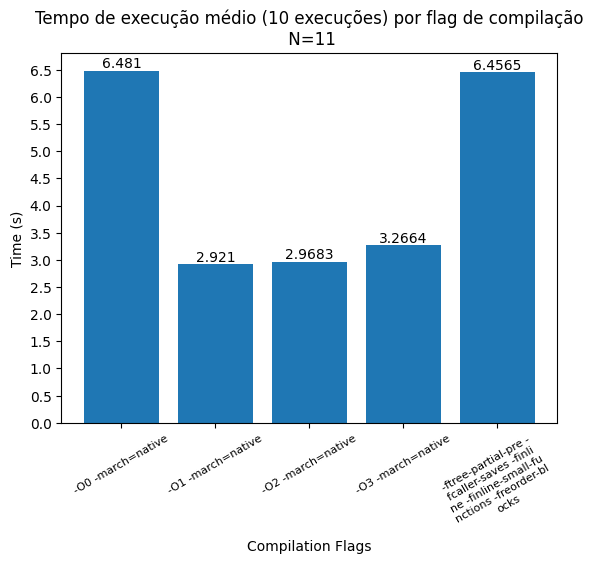

In [24]:
runArg11 = df[df['runArg'] == 11]

times = runArg11['meanTime'].values
labels = runArg11['compilationFlags'].values
labels = [re.sub("(.{20})", "\\1\n", label, 0, re.DOTALL) for label in labels]

fig,ax = plt.subplots()
plt.yticks(np.arange(0, max(times)+1, 0.5))
bars = plt.bar(labels, times)
ax.bar_label(bars)
plt.ylabel('Time (s)')
plt.xlabel('Compilation Flags')
plt.xticks(rotation=30, fontsize=8)
plt.title("Tempo de execução médio (10 execuções) por flag de compilação\n N=11")

plt.savefig('analysis/meanTimeN11.png' , bbox_inches='tight')
plt.show()

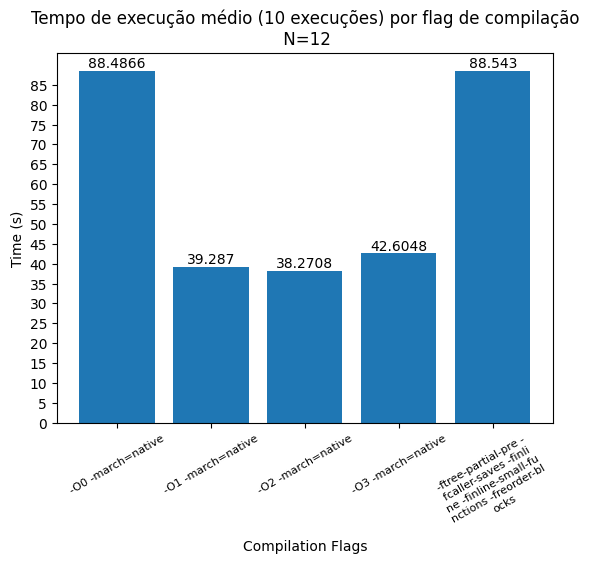

In [25]:
runArg12 = df[df['runArg'] == 12]

times = runArg12['meanTime'].values
labels = runArg12['compilationFlags'].values
labels = [re.sub("(.{20})", "\\1\n", label, 0, re.DOTALL) for label in labels]

fig,ax = plt.subplots()
plt.yticks(np.arange(0, max(times)+1, 5))
bars = plt.bar(labels, times)
ax.bar_label(bars)
plt.ylabel('Time (s)')
plt.xlabel('Compilation Flags')
plt.xticks(rotation=30, fontsize=8)
plt.title("Tempo de execução médio (10 execuções) por flag de compilação\n N=12")

plt.savefig('analysis/meanTimeN12.png' , bbox_inches='tight')
plt.show()

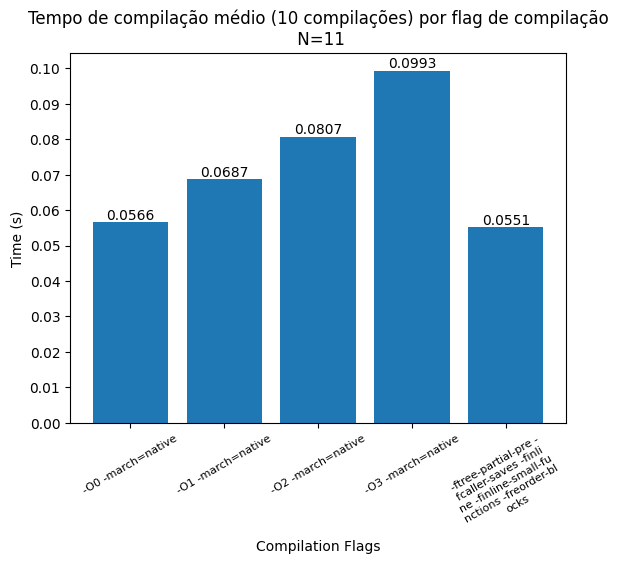

In [26]:
runArg11 = df[df['runArg'] == 11]

times = runArg11['meanCompilationTime'].values
labels = runArg11['compilationFlags'].values
labels = [re.sub("(.{20})", "\\1\n", label, 0, re.DOTALL) for label in labels]

fig,ax = plt.subplots()
plt.yticks(np.arange(0, max(times)+1, 0.01))
bars = plt.bar(labels, times)
ax.bar_label(bars)
plt.ylabel('Time (s)')
plt.xlabel('Compilation Flags')
plt.xticks(rotation=30, fontsize=8)
plt.title("Tempo de compilação médio (10 compilações) por flag de compilação\n N=11")

plt.savefig('analysis/meanCompilationTimeN11.png', bbox_inches='tight')
plt.show()

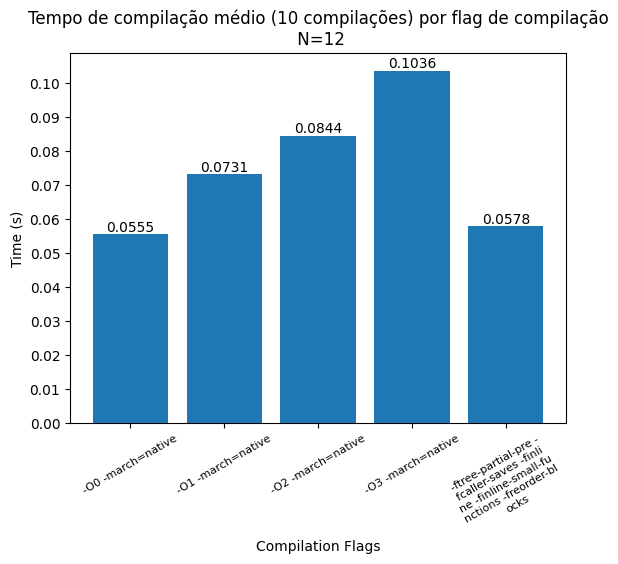

In [27]:
runArg12 = df[df['runArg'] == 12]

times = runArg12['meanCompilationTime'].values
labels = runArg12['compilationFlags'].values
labels = [re.sub("(.{20})", "\\1\n", label, 0, re.DOTALL) for label in labels]

fig,ax = plt.subplots()
plt.yticks(np.arange(0, max(times)+1, 0.01))
bars = plt.bar(labels, times)
ax.bar_label(bars)
plt.ylabel('Time (s)')
plt.xlabel('Compilation Flags')
plt.xticks(rotation=30, fontsize=8)
plt.title("Tempo de compilação médio (10 compilações) por flag de compilação\n N=12")

plt.savefig('analysis/meanCompilationTimeN12.png', bbox_inches='tight')
plt.show()

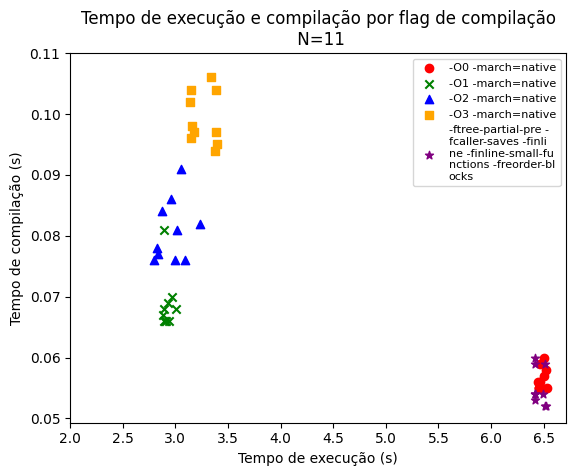

In [28]:
def customFloor(x,y):
    return floor(x*y)/y

def customCeil(x,y):
    return ceil(x*y)/y

runArg11 = df[df['runArg'] == 11]

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


o0 = runArg11[runArg11['compilationFlags'].str.contains('-O0')]
o1 = runArg11[runArg11['compilationFlags'].str.contains('-O1')]
o2 = runArg11[runArg11['compilationFlags'].str.contains('-O2')]
o3 = runArg11[runArg11['compilationFlags'].str.contains('-O3')]
customFlags = runArg11[runArg11['compilationFlags'].str.contains('-ftree')]

xvalues = o0['times'].values[0] + o1['times'].values[0] + o2['times'].values[0] + o3['times'].values[0] + customFlags['times'].values[0]

yvalues = o0['compilationTimes'].values[0] + o1['compilationTimes'].values[0] + o2['compilationTimes'].values[0] + o3['compilationTimes'].values[0] + customFlags['compilationTimes'].values[0]

o0Scatter = plt.scatter(o0['times'].values[0], o0['compilationTimes'].values[0], c=colors[0], marker='o')
o1Scatter = plt.scatter(o1['times'].values[0], o1['compilationTimes'].values[0], c=colors[1], marker='x')
o2Scatter = plt.scatter(o2['times'].values[0], o2['compilationTimes'].values[0], c=colors[2], marker='^')
o3Scatter = plt.scatter(o3['times'].values[0], o3['compilationTimes'].values[0], c=colors[3], marker='s')
customFlagsScatter = plt.scatter(customFlags['times'].values[0], customFlags['compilationTimes'].values[0], c=colors[4], marker='*')

labels = [o0['compilationFlags'].values[0], o1['compilationFlags'].values[0], o2['compilationFlags'].values[0], o3['compilationFlags'].values[0], customFlags['compilationFlags'].values[0]]
labels = [re.sub("(.{20})", "\\1\n", label, 0, re.DOTALL) for label in labels]


plt.xticks(np.arange(floor(min(xvalues)), ceil(max(xvalues)), 0.5))
plt.yticks(np.arange(customFloor(min(yvalues),100), customCeil(max(yvalues),100)+0.01, 0.01))
plt.legend((o0Scatter, o1Scatter, o2Scatter, o3Scatter, customFlagsScatter),
            labels,
            scatterpoints=1,
            loc='upper right',
            ncol=1,
            fontsize=8)

plt.xlabel('Tempo de execução (s)')
plt.ylabel('Tempo de compilação (s)')

plt.title("Tempo de execução e compilação por flag de compilação\n N=11")

plt.savefig('analysis/executionAndCompilationTimeN11.png', bbox_inches='tight')
plt.show()

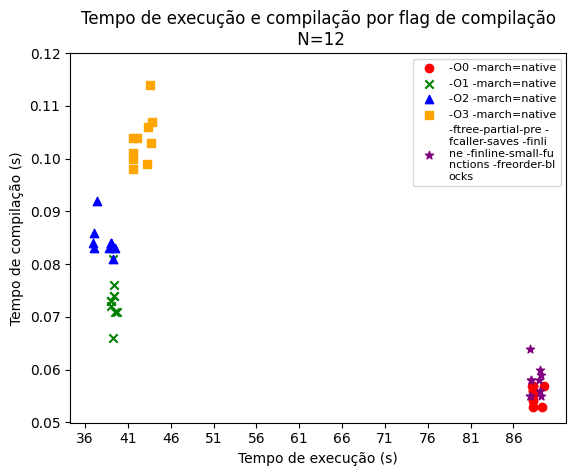

In [29]:
def customFloor(x,y):
    return floor(x*y)/y

def customCeil(x,y):
    return ceil(x*y)/y

runArg12 = df[df['runArg'] == 12]

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


o0 = runArg12[runArg12['compilationFlags'].str.contains('-O0')]
o1 = runArg12[runArg12['compilationFlags'].str.contains('-O1')]
o2 = runArg12[runArg12['compilationFlags'].str.contains('-O2')]
o3 = runArg12[runArg12['compilationFlags'].str.contains('-O3')]
customFlags = runArg12[runArg12['compilationFlags'].str.contains('-ftree')]

xvalues = o0['times'].values[0] + o1['times'].values[0] + o2['times'].values[0] + o3['times'].values[0] + customFlags['times'].values[0]

yvalues = o0['compilationTimes'].values[0] + o1['compilationTimes'].values[0] + o2['compilationTimes'].values[0] + o3['compilationTimes'].values[0] + customFlags['compilationTimes'].values[0]

o0Scatter = plt.scatter(o0['times'].values[0], o0['compilationTimes'].values[0], c=colors[0], marker='o')
o1Scatter = plt.scatter(o1['times'].values[0], o1['compilationTimes'].values[0], c=colors[1], marker='x')
o2Scatter = plt.scatter(o2['times'].values[0], o2['compilationTimes'].values[0], c=colors[2], marker='^')
o3Scatter = plt.scatter(o3['times'].values[0], o3['compilationTimes'].values[0], c=colors[3], marker='s')
customFlagsScatter = plt.scatter(customFlags['times'].values[0], customFlags['compilationTimes'].values[0], c=colors[4], marker='*')

labels = [o0['compilationFlags'].values[0], o1['compilationFlags'].values[0], o2['compilationFlags'].values[0], o3['compilationFlags'].values[0], customFlags['compilationFlags'].values[0]]
labels = [re.sub("(.{20})", "\\1\n", label, 0, re.DOTALL) for label in labels]


plt.xticks(np.arange(floor(min(xvalues)), ceil(max(xvalues)), 5))
plt.yticks(np.arange(customFloor(min(yvalues),100), customCeil(max(yvalues),100)+0.01, 0.01))
plt.legend((o0Scatter, o1Scatter, o2Scatter, o3Scatter, customFlagsScatter),
            labels,
            scatterpoints=1,
            loc='upper right',
            ncol=1,
            fontsize=8)

plt.xlabel('Tempo de execução (s)')
plt.ylabel('Tempo de compilação (s)')

plt.title("Tempo de execução e compilação por flag de compilação\n N=12")

plt.savefig('analysis/executionAndCompilationTimeN12.png', bbox_inches='tight')
plt.show()